# Low-Dimensional Representation

Given a distance matrix, can we recover the positions of the original data in Euclidean space? In fact, we can find points in Euclidean space that has a distance matrix very similar to the original, and the difference between the two can be made smaller by increasing the dimensionality of the representing space. This technique is known as **multi-dimensional scaling (MDS)**.

This implies that given a distance matrix we can generate a feature space to "explain" the data in the distance matrix. Such representations are *not* unique; rotating the dataset won't change the distances, so any rotation accomplishes the same task. But it's a start.

One use of this is representing data from a high-dimensional space in a low-dimensional one. For example, the iris dataset has four features; plotting every pair of features would lead to six plots. But using this technique we can create a visualization that approximates the distance between points from the original dataset, and thus can capture the essence of the relationship between points.

Additionally, data that never started with a Euclidean representation and for which only distances were computed, such as our headlines dataset, can be given a representation in Euclidean space. This can be used for visualization as well.

I demonstrate MDS for both the iris dataset and the headlines dataset.

## MDS for the Iris Dataset

In [4]:
from sklearn.datasets import load_iris
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
%matplotlib inline

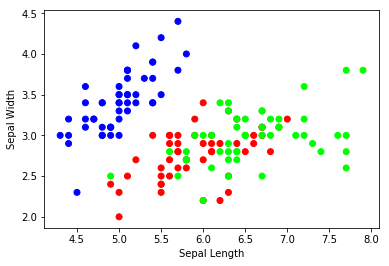

In [5]:
iris_obj = load_iris()
iris_data = iris_obj.data
species = iris_obj.target

plt.scatter(iris_data[:, 0], iris_data[:, 1], c=species, cmap=plt.cm.brg)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

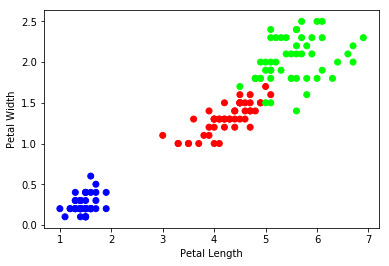

In [6]:
plt.scatter(iris_data[:, 2], iris_data[:, 3], c=species, cmap=plt.cm.brg)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

In [7]:
iris_mds = MDS(n_components=2, dissimilarity="euclidean")
iris_2d = iris_mds.fit_transform(iris_data)
iris_2d[:5, :]

array([[-2.5087528 ,  1.03524396],
       [-2.66886481,  0.60497439],
       [-2.82743451,  0.71149307],
       [-2.73734313,  0.48921834],
       [-2.55058811,  1.06973804]])

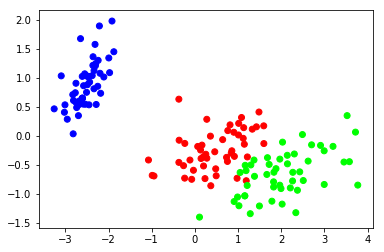

In [8]:
plt.scatter(iris_2d[:, 0], iris_2d[:, 1], c=species, cmap=plt.cm.brg)
plt.show()

As we observed in other videos, the setosa species is very different from the versicolor or virginica species; the latter two species, while different, are more difficult to differentiate.

## Headlines Dataset

Below I compute the Jaccard similarity of the data in the headlines dataset. Remember that we work with dissimilarities with MDS, which is easily obtained once we have Jaccard similarities. (Simply subtract the Jaccard similarity from 1 to get the Jaccard distance.)

In [9]:
import pandas as pd
from nltk import ngrams
import numpy as np

In [10]:
headlines = pd.read_csv("HNHeadlines.txt", header=None, index_col=0).iloc[:, 0]
headline_sets = [set(''.join(u) for u in ngrams(h.lower(), 3)) for h in headlines]
sims = np.zeros((len(headlines), len(headlines)))    # Will contain the affinity matrix
for i in range(len(headlines)):
    for j in range(i, len(headlines)):
        h1, h2 = headline_sets[i], headline_sets[j]
        js = len(h1.intersection(h2))/len(h1.union(h2))    # Compute the Jaccard similarity for the two documents
        sims[i,j] = sims[j,i] = js    # Store the Jaccard similarity in the appropriate entries of the matrix

In [11]:
headline_mds = MDS(n_components=2, dissimilarity="precomputed")
headlines_coords = headline_mds.fit_transform(1 - sims)
headlines_coords[:5, :]

array([[-0.02053715,  0.64307354],
       [-0.74155165, -0.06313655],
       [-0.29010331,  0.54952474],
       [-0.03517692, -0.65540093],
       [-0.06714792,  0.36681229]])

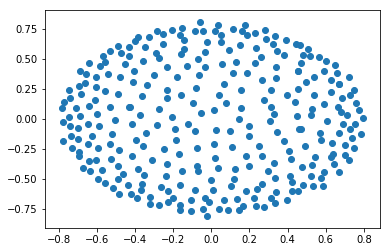

In [12]:
plt.scatter(x=headlines_coords[:, 0], y=headlines_coords[:, 1])
plt.show()

My takeaway from this image is that our representation of the headlines leads to no headline looking similar, thus they are spread out and roughly equidistant. Using sets of 3-grams and Jaccard distance between them to represent distances leads to no clusters. This could partly explain our struggles to cluster them effectively. We should consider different representations of the headlines for clustering.